## Importing relevant Librarys

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import hvplot.pandas  
import holoviews as hv



## EDA


In [2]:
data = pd.read_csv('../Data/entsoe_data_2024_2025.csv')

data.head()

,datetime,country,price,nuclear,fossil_gas,solar,waste,wind_offshore,wind_onshore,_biomass_actual_aggregated_,...,fossil_oil_shale,fossil_peat,geothermal,hydro_pumped_storage,hydro_run_of_river_and_poundage,hydro_total,hydro_water_reservoir,marine,other,other_renewable
0,2024-01-01 00:00:00+01:00,CZ,0.10,3707.0,238.0,0.0,23.0,NaN,83.0,NaN,...,NaN,NaN,NaN,40.0,79.0,530.0,451.0,NaN,53.0,273.0
1,2024-01-01 01:00:00+01:00,CZ,0.01,3730.0,238.0,0.0,23.0,NaN,85.0,NaN,...,NaN,NaN,NaN,94.0,79.0,530.0,451.0,NaN,53.0,274.0
2,2024-01-01 02:00:00+01:00,CZ,0.02,3755.0,238.0,0.0,22.0,NaN,86.0,NaN,...,NaN,NaN,NaN,336.0,79.0,531.0,452.0,NaN,53.0,274.0
3,2024-01-01 03:00:00+01:00,CZ,0.00,3819.0,239.0,0.0,23.0,NaN,85.0,NaN,...,NaN,NaN,NaN,956.0,80.0,492.0,412.0,NaN,53.0,273.0
4,2024-01-01 04:00:00+01:00,CZ,-0.01,3823.0,240.0,0.0,23.0,NaN,86.0,NaN,...,NaN,NaN,NaN,1096.0,80.0,487.0,407.0,NaN,54.0,271.0


We have a dataset featuring the electricity Grid of various EU countries

In [3]:
for columns in data.columns:
    print(columns)

datetime
country
price
nuclear
fossil_gas
solar
waste
wind_offshore
wind_onshore
_biomass_actual_aggregated_
_fossil_brown_coal_lignite_actual_aggregated_
_fossil_coal_derived_gas_actual_aggregated_
_fossil_gas_actual_aggregated_
_fossil_hard_coal_actual_aggregated_
_fossil_oil_actual_aggregated_
_hydro_pumped_storage_actual_aggregated_
_hydro_pumped_storage_actual_consumption_
_hydro_run_of_river_and_poundage_actual_aggregated_
_hydro_water_reservoir_actual_aggregated_
_other_actual_aggregated_
_other_renewable_actual_aggregated_
_solar_actual_aggregated_
_wind_onshore_actual_aggregated_
biomass
energy_storage
fossil_brown_coal_lignite
fossil_coal_derived_gas
fossil_hard_coal
fossil_oil
fossil_oil_shale
fossil_peat
geothermal
hydro_pumped_storage
hydro_run_of_river_and_poundage
hydro_total
hydro_water_reservoir
marine
other
other_renewable


In [4]:
data.shape

(301391, 39)

In [5]:
data['datetime'] = pd.to_datetime(data['datetime'], utc=True)


In [6]:
data.country.unique() 
Country = mapping = {
    'CZ': 'Czech Republic',
    'DE_LU': 'Germany & Luxembourg',
    'SK': 'Slovakia',
    'PL': 'Poland',
    'AT': 'Austria',
    'HU': 'Hungary',
    'FR': 'France',
    'ES': 'Spain',
    'PT': 'Portugal',
    'BE': 'Belgium',
    'NL': 'Netherlands',
    'DK_1': 'Denmark (West)',
    'IT_NORD': 'Italy (North)',
    'HR': 'Croatia',
    'SI': 'Slovenia',
    'IE_SEM': 'Ireland & Northern Ireland',
    'LV': 'Latvia',
    'LT': 'Lithuania',
    'EE': 'Estonia',
    'CH': 'Switzerland',
    'RO': 'Romania',
    'NO_3': 'Norway (Zone 3)',
    'SE_4': 'Sweden (Zone 4)'
}

data['country'] = data['country'].map(Country)
data.head(
)


,datetime,country,price,nuclear,fossil_gas,solar,waste,wind_offshore,wind_onshore,_biomass_actual_aggregated_,...,fossil_oil_shale,fossil_peat,geothermal,hydro_pumped_storage,hydro_run_of_river_and_poundage,hydro_total,hydro_water_reservoir,marine,other,other_renewable
0,2023-12-31 23:00:00+00:00,Czech Republic,0.10,3707.0,238.0,0.0,23.0,NaN,83.0,NaN,...,NaN,NaN,NaN,40.0,79.0,530.0,451.0,NaN,53.0,273.0
1,2024-01-01 00:00:00+00:00,Czech Republic,0.01,3730.0,238.0,0.0,23.0,NaN,85.0,NaN,...,NaN,NaN,NaN,94.0,79.0,530.0,451.0,NaN,53.0,274.0
2,2024-01-01 01:00:00+00:00,Czech Republic,0.02,3755.0,238.0,0.0,22.0,NaN,86.0,NaN,...,NaN,NaN,NaN,336.0,79.0,531.0,452.0,NaN,53.0,274.0
3,2024-01-01 02:00:00+00:00,Czech Republic,0.00,3819.0,239.0,0.0,23.0,NaN,85.0,NaN,...,NaN,NaN,NaN,956.0,80.0,492.0,412.0,NaN,53.0,273.0
4,2024-01-01 03:00:00+00:00,Czech Republic,-0.01,3823.0,240.0,0.0,23.0,NaN,86.0,NaN,...,NaN,NaN,NaN,1096.0,80.0,487.0,407.0,NaN,54.0,271.0


In [7]:
data.country.unique()

array(['Czech Republic', 'Germany & Luxembourg', 'Slovakia', 'Poland',
       'Austria', 'Hungary', 'France', 'Spain', 'Portugal', 'Belgium',
       'Netherlands', 'Denmark (West)', 'Italy (North)', 'Croatia',
       'Slovenia', 'Ireland & Northern Ireland', 'Latvia', 'Lithuania',
       'Estonia', 'Switzerland', 'Romania', 'Norway (Zone 3)',
       'Sweden (Zone 4)'], dtype=object)

In [8]:
data.isnull().sum()

datetime                                                    0
country                                                     0
price                                                      22
nuclear                                                170375
fossil_gas                                              32394
solar                                                   26302
waste                                                  104912
wind_offshore                                          209678
wind_onshore                                             6192
_biomass_actual_aggregated_                            288288
_fossil_brown_coal_lignite_actual_aggregated_          288288
_fossil_coal_derived_gas_actual_aggregated_            288288
_fossil_gas_actual_aggregated_                         288288
_fossil_hard_coal_actual_aggregated_                   288288
_fossil_oil_actual_aggregated_                         288288
_hydro_pumped_storage_actual_aggregated_               288288
_hydro_p

## The dataset provides a time series for each energy zone.
We can further separate these time series to identify common patterns and trends that occur across the EU.

Additionally, we can differentiate between clean and renewable energy sources and fuel-based sources.



In [9]:
data_de = data[data['country'] == 'Germany & Luxembourg']
data_cz = data[data['country'] == 'Czech Republic']
data_sk = data[data['country'] == 'Slovakia']
data_pl = data[data['country'] == 'Poland']
data_at = data[data['country'] == 'Austria']
data_hu = data[data['country'] == 'Hungary']
data_fr = data[data['country'] == 'France']
data_es = data[data['country'] == 'Spain']
data_pt = data[data['country'] == 'Portugal']
data_be = data[data['country'] == 'Belgium']
data_nl = data[data['country'] == 'Netherlands']
data_dk = data[data['country'] == 'Denmark (West)']
data_it = data[data['country'] == 'Italy (North)']
data_hr = data[data['country'] == 'Croatia']
data_si = data[data['country'] == 'Slovenia']
data_ie = data[data['country'] == 'Ireland & Northern Ireland']
data_lv = data[data['country'] == 'Latvia']
data_lt = data[data['country'] == 'Lithuania']
data_ee = data[data['country'] == 'Estonia']
data_ch = data[data['country'] == 'Switzerland']
data_ro = data[data['country'] == 'Romania']
data_no = data[data['country'] == 'Norway (Zone 3)']
data_se = data[data['country'] == 'Sweden (Zone 4)']

print(data_de.shape)
print(data_cz.shape)
print(data_sk.shape)
print(data_pl.shape)
print(data_at.shape)
print(data_hu.shape)
print(data_fr.shape)
print(data_es.shape)
print(data_pt.shape)
print(data_be.shape)
print(data_nl.shape)
print(data_dk.shape)
print(data_it.shape)
print(data_hr.shape)
print(data_si.shape)
print(data_ie.shape)
print(data_lv.shape)
print(data_lt.shape)
print(data_ee.shape)
print(data_ch.shape)
print(data_ro.shape)
print(data_no.shape)
print(data_se.shape)



(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13103, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)
(13104, 39)


For this Project i will focus my analysis on the German energy market

In [10]:
data_de.head()

,datetime,country,price,nuclear,fossil_gas,solar,waste,wind_offshore,wind_onshore,_biomass_actual_aggregated_,...,fossil_oil_shale,fossil_peat,geothermal,hydro_pumped_storage,hydro_run_of_river_and_poundage,hydro_total,hydro_water_reservoir,marine,other,other_renewable
13104,2023-12-31 23:00:00+00:00,Germany & Luxembourg,0.10,NaN,2894.25,3.25,584.00,5679.25,29754.00,NaN,...,NaN,NaN,29.0,2512.75,1836.00,1984.25,148.25,NaN,152.00,113.0
13105,2024-01-01 00:00:00+00:00,Germany & Luxembourg,0.01,NaN,2824.50,3.00,569.25,5345.75,29660.50,NaN,...,NaN,NaN,28.5,2939.75,1849.25,1997.25,148.00,NaN,152.00,113.0
13106,2024-01-01 01:00:00+00:00,Germany & Luxembourg,0.00,NaN,2852.50,3.00,561.75,5188.50,29743.50,NaN,...,NaN,NaN,28.0,3455.25,1855.25,2017.50,162.25,NaN,152.00,113.0
13107,2024-01-01 02:00:00+00:00,Germany & Luxembourg,-0.01,NaN,2874.50,3.25,572.50,4674.25,29208.00,NaN,...,NaN,NaN,28.0,3418.50,1853.75,2026.75,173.00,NaN,152.25,113.0
13108,2024-01-01 03:00:00+00:00,Germany & Luxembourg,-0.03,NaN,2857.00,3.00,563.25,4439.25,29138.25,NaN,...,NaN,NaN,28.0,3458.00,1834.00,2048.25,214.25,NaN,152.00,113.0


In [11]:
data_de.isnull().sum()


datetime                                                   0
country                                                    0
price                                                      1
nuclear                                                13104
fossil_gas                                                 1
solar                                                      1
waste                                                      1
wind_offshore                                              1
wind_onshore                                               1
_biomass_actual_aggregated_                            13104
_fossil_brown_coal_lignite_actual_aggregated_          13104
_fossil_coal_derived_gas_actual_aggregated_            13104
_fossil_gas_actual_aggregated_                         13104
_fossil_hard_coal_actual_aggregated_                   13104
_fossil_oil_actual_aggregated_                         13104
_hydro_pumped_storage_actual_aggregated_               13104
_hydro_pumped_storage_ac

In [12]:
data_de = data_de.drop(columns=['nuclear','_fossil_brown_coal_lignite_actual_aggregated_','_fossil_coal_derived_gas_actual_aggregated_',
                                '_fossil_hard_coal_actual_aggregated_','_fossil_oil_actual_aggregated_','_fossil_gas_actual_aggregated_',
                                '_hydro_pumped_storage_actual_aggregated_','_hydro_pumped_storage_actual_consumption_',
                                '_hydro_run_of_river_and_poundage_actual_aggregated_','_hydro_water_reservoir_actual_aggregated_',
                                '_solar_actual_aggregated_','_wind_onshore_actual_aggregated_',
                                'fossil_oil_shale','fossil_peat','_other_actual_aggregated_','marine','energy_storage',
                                '_biomass_actual_aggregated_',"_other_renewable_actual_aggregated_"])
data_de.head()

,datetime,country,price,fossil_gas,solar,waste,wind_offshore,wind_onshore,biomass,fossil_brown_coal_lignite,fossil_coal_derived_gas,fossil_hard_coal,fossil_oil,geothermal,hydro_pumped_storage,hydro_run_of_river_and_poundage,hydro_total,hydro_water_reservoir,other,other_renewable
13104,2023-12-31 23:00:00+00:00,Germany & Luxembourg,0.10,2894.25,3.25,584.00,5679.25,29754.00,3945.50,3391.75,455.75,1860.75,398.00,29.0,2512.75,1836.00,1984.25,148.25,152.00,113.0
13105,2024-01-01 00:00:00+00:00,Germany & Luxembourg,0.01,2824.50,3.00,569.25,5345.75,29660.50,3908.75,3372.75,419.00,1854.75,398.00,28.5,2939.75,1849.25,1997.25,148.00,152.00,113.0
13106,2024-01-01 01:00:00+00:00,Germany & Luxembourg,0.00,2852.50,3.00,561.75,5188.50,29743.50,3893.00,3373.50,420.00,1828.75,398.00,28.0,3455.25,1855.25,2017.50,162.25,152.00,113.0
13107,2024-01-01 02:00:00+00:00,Germany & Luxembourg,-0.01,2874.50,3.25,572.50,4674.25,29208.00,3868.00,3393.00,426.75,1817.50,397.50,28.0,3418.50,1853.75,2026.75,173.00,152.25,113.0
13108,2024-01-01 03:00:00+00:00,Germany & Luxembourg,-0.03,2857.00,3.00,563.25,4439.25,29138.25,3872.50,3393.75,402.75,1832.75,397.75,28.0,3458.00,1834.00,2048.25,214.25,152.00,113.0


- removing irrelavent columns like nuclear 
- also removing columns which provide no further content/information

In [13]:
price0 = data_de[data_de['price'].isna()]
price0

,datetime,country,price,fossil_gas,solar,waste,wind_offshore,wind_onshore,biomass,fossil_brown_coal_lignite,fossil_coal_derived_gas,fossil_hard_coal,fossil_oil,geothermal,hydro_pumped_storage,hydro_run_of_river_and_poundage,hydro_total,hydro_water_reservoir,other,other_renewable
21864,2024-12-30 23:00:00+00:00,Germany & Luxembourg,NaN,8649.5,7.25,756.0,1914.0,19804.0,4177.75,7793.5,396.0,4097.75,380.0,34.0,810.0,1367.75,1585.75,218.0,236.75,100.75


In [14]:
data_de.describe()


,price,fossil_gas,solar,waste,wind_offshore,wind_onshore,biomass,fossil_brown_coal_lignite,fossil_coal_derived_gas,fossil_hard_coal,fossil_oil,geothermal,hydro_pumped_storage,hydro_run_of_river_and_poundage,hydro_total,hydro_water_reservoir,other,other_renewable
count,13103.000000,13103.000000,13103.000000,13103.000000,13103.000000,13103.000000,13103.000000,13103.000000,13103.000000,13103.000000,13103.000000,13103.000000,13103.000000,13103.000000,13104.000000,13103.000000,13103.000000,13103.000000
mean,82.515013,6669.306298,7923.698034,708.458521,2832.281539,12395.118764,4159.636966,8018.880791,507.255673,3273.075180,356.009807,25.168244,2712.959055,1697.886515,1887.040999,189.298500,181.153782,92.389173
std,54.392260,3790.938598,11879.294037,131.183216,1912.141199,9691.566664,337.773702,3214.672821,102.547145,2129.945142,93.675368,5.813033,1568.787533,271.071428,386.770646,192.132246,59.669251,18.420297
min,-250.320000,1351.250000,0.000000,0.000000,0.000000,47.000000,3220.000000,1948.750000,125.500000,237.250000,37.000000,6.000000,78.750000,1011.000000,0.000000,0.000000,111.000000,50.000000
25%,57.955000,3613.375000,6.750000,636.125000,1121.875000,4840.750000,3918.625000,5166.625000,446.750000,1497.875000,319.000000,21.000000,1310.375000,1473.000000,1588.500000,54.000000,137.000000,81.750000
50%,84.360000,5897.500000,327.000000,725.500000,2589.750000,9787.500000,4130.500000,8283.000000,507.500000,2770.000000,365.000000,26.000000,2486.750000,1733.250000,1885.000000,120.250000,163.000000,89.250000
75%,109.100000,8754.250000,12971.875000,806.750000,4442.125000,17806.000000,4388.625000,10648.625000,580.500000,4912.625000,374.500000,30.000000,4017.375000,1914.000000,2134.062500,251.500000,221.000000,100.250000
max,936.280000,20161.500000,52084.500000,964.750000,7901.500000,46510.750000,5284.750000,17173.250000,786.000000,11833.250000,1343.000000,36.000000,6996.750000,2313.000000,3095.250000,1029.750000,332.000000,176.000000


Checking the size of the different Energy sources

In [15]:

energy_de = data_de.drop(columns=['price','country','datetime'])
means = energy_de.mean().sort_values()
print(means)

    

geothermal                            25.168244
other_renewable                       92.389173
other                                181.153782
hydro_water_reservoir                189.298500
fossil_oil                           356.009807
fossil_coal_derived_gas              507.255673
waste                                708.458521
hydro_run_of_river_and_poundage     1697.886515
hydro_total                         1887.040999
hydro_pumped_storage                2712.959055
wind_offshore                       2832.281539
fossil_hard_coal                    3273.075180
biomass                             4159.636966
fossil_gas                          6669.306298
solar                               7923.698034
fossil_brown_coal_lignite           8018.880791
wind_onshore                       12395.118764
dtype: float64


In [16]:
for i in means:
    print(f"{(i/ means.sum())*100:.5f}%" ) 






0.04693%
0.17227%
0.33779%
0.35297%
0.66383%
0.94585%
1.32102%
3.16595%
3.51865%
5.05870%
5.28119%
6.10311%
7.75623%
12.43586%
14.77485%
14.95234%
23.11245%


In [17]:
percentages = (means / means.sum() * 100)
print(f"\nSumme: {percentages.sum():.5f}%")


Summe: 100.00000%


wind (onshore), solar and brown coal and fossil gas are by far the biggest energy sources in germany,
and will most likely have the biggest impact on the Energy Price

In [18]:
#typical energy production in Germany:

total = means.sum()
print(f"Daily energy production in Germany: {total:.2f} MW")

Daily energy production in Germany: 53629.62 MW


We aim to further analyze how electricity prices correlate with different forms of energy generation.

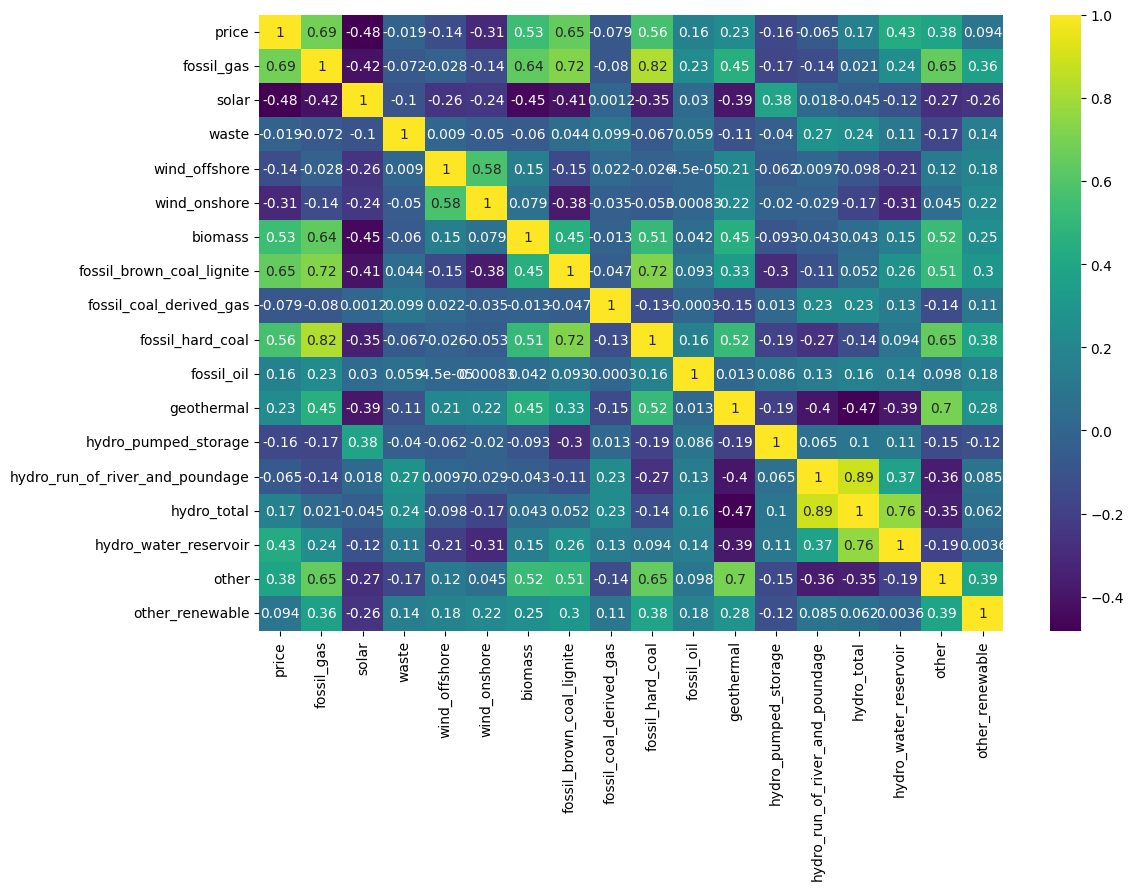

In [19]:
numeric_data_de = data_de.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))

sns.heatmap(numeric_data_de.corr(), annot=True, cmap='viridis')
plt.show()



# Obersvations

- Great correlation between fossil gas and hard coal.
- For “other” and geothermal sources, we need to investigate further to understand what influences these patterns.
- Correlation between hydro and hydro (likely reservoir vs. run-of-river) should be examined more closely.
- Notable relationships between biomass and solar.

# Mission

- Prices show a strong correlation with solar, fossil gas, brown coal, and biomass.  
- We want to further analyze these correlations and explore whether we can forecast energy prices based on these developments.


In [20]:
data_de.dtypes

datetime                           datetime64[ns, UTC]
country                                         object
price                                          float64
fossil_gas                                     float64
solar                                          float64
waste                                          float64
wind_offshore                                  float64
wind_onshore                                   float64
biomass                                        float64
fossil_brown_coal_lignite                      float64
fossil_coal_derived_gas                        float64
fossil_hard_coal                               float64
fossil_oil                                     float64
geothermal                                     float64
hydro_pumped_storage                           float64
hydro_run_of_river_and_poundage                float64
hydro_total                                    float64
hydro_water_reservoir                          float64
other     

In [21]:
# Nach Tag aggregieren (Durchschnittspreis pro Tag)
data_daily = data_de.set_index('datetime').resample('D')[['price',
    "fossil_gas",
    "solar",
    "waste",
    "wind_offshore",
    "wind_onshore",
    "biomass",
    "fossil_brown_coal_lignite",
    "fossil_coal_derived_gas",
    "fossil_hard_coal",
    "fossil_oil",
    "geothermal",
    "hydro_pumped_storage",
    "hydro_run_of_river_and_poundage",
    "hydro_total",
    "hydro_water_reservoir",
    "other",
    "other_renewable"]].mean().reset_index()

# Plot erstellen
price = data_daily.hvplot.line(
    x='datetime',
    y='price',
    title='German Electricity Price 2024-2025 (Daily Average)',
    xlabel='Date',
    ylabel='Price in €/MWh',
    width=1200,
    height=500,
    line_width=2,
    color='#1f77b4'
)
zero_line = hv.HLine(0).opts(
    color='black', 
    line_dash='dashed', 
    line_width=2,
    alpha=0.7
)
price* zero_line

:Overlay
   .Curve.I :Curve   [datetime]   (price)
   .HLine.I :HLine   [x,y]

In [22]:
#price vs fossil_gas
price_gas = data_de.hvplot.scatter(x='fossil_gas', y='price', title=' Price vs Fossil_Gas production',
                                   xlabel='Fossil_Gas Production in MW', ylabel='Price in €/MWh (total)', color='#ff7f0e', size=50, alpha=0.6)
price_gas

# NaN-Werte entfernen
valid_data = data_de[['fossil_gas', 'price']].dropna()

x = valid_data['fossil_gas'].values
y = valid_data['price'].values

# Lineare Regression (Polynom 1. Grades)
coefficients = np.polyfit(x, y, 1)  # [slope, intercept]
regression_line = np.poly1d(coefficients)

# x-Werte für die Linie
x_line = np.linspace(x.min(), x.max(), 100)
y_line = regression_line(x_line)

# Scatter Plot
price_gas = data_de.hvplot.scatter(
    x='fossil_gas', y='price', 
    title='Price vs Fossil Gas Production',
    xlabel='Fossil Gas Production (MW)', 
    ylabel='Price (€/MWh)',
    color='#ff7f0e', size=1, alpha=0.6
)

# Regressionsgerade
reg_df = pd.DataFrame({'fossil_gas': x_line, 'price': y_line})
regression = reg_df.hvplot.line(
    x='fossil_gas', y='price', 
    color='red', line_width=3, 
    label=f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}'
)

# Kombinieren
plot = price_gas * regression * zero_line
plot.opts(width=1200, height=500) 

:Overlay
   .Scatter.I                                           :Scatter   [fossil_gas]   (price)
   .Curve.Y_equals_0_full_stop_01x_plus_16_full_stop_83 :Curve   [fossil_gas]   (price)
   .HLine.I                                             :HLine   [x,y]

We observe a clear correlation between higher fossil gas production and rising energy prices.


During periods of particularly high production, this can even lead to  or strongly coincide with significant price increases.


There also appears to be a strong correlation with other fossil energy sources which we will look more closely over later

In [54]:
fossils = data_daily.hvplot.line(
    x='datetime',
    y=['fossil_gas','fossil_brown_coal_lignite','fossil_hard_coal'],
    title='Daily Fossil Production mix',
    xlabel='Date',
    ylabel='Fossil Gas Production',
    width=1200,
    height=500,

)
fossils =fossils * zero_line
fossils

:Overlay
   .NdOverlay.I :NdOverlay   [Variable]
      :Curve   [datetime]   (value)
   .HLine.I     :HLine   [x,y]

We can see that the production levels of different fossil fuels are strongly correlated with one another.
It can also be observed that this correlation contains a clear seasonal component.
This pattern is likely to be inversely related to solar generation.


In [53]:
wind = data_daily.hvplot.line(
    x='datetime',
    y=['wind_onshore','wind_offshore'],
    title='German Wind Production 2024-2025 (Daily Average)',
    xlabel='Date',
    ylabel='Wind Production',
    width=1200,
    height=500,
)

wind

:NdOverlay   [Variable]
   :Curve   [datetime]   (value)

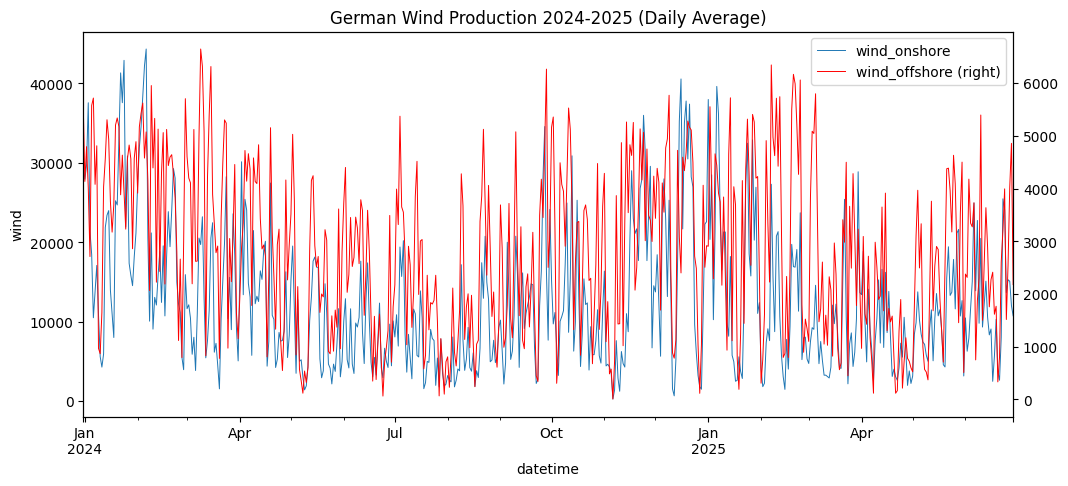

In [56]:
ax = data_daily.plot(
    x='datetime',
    y='wind_onshore',
    title='German Wind Production 2024-2025 (Daily Average)',
    xlabel='Date',
    ylabel='wind',
    figsize=(12, 5),
    linewidth=0.7
)

bx = data_daily.plot(
    x='datetime',
    y='wind_offshore',
    ax=ax,
    secondary_y=True,
    color='red',
    linewidth=0.7
)
plt.show()


On and Offshore energy Production does seem to have a somewhat clear correlation, but this correlation seems to be way to noisy and disturbt for any predictiction in combining them together, 
with Wind onshore having a lot more production and  relevance in the german Grid, this is the factor we have to focus on 

Onshore and offshore energy production appear to show a certain degree of correlation, but the relationship is too noisy and irregular to allow for meaningful predictive modeling when combining the two.
Since onshore wind generation has significantly higher output and relevance in the German grid, it is the factor we need to focus on.

We also want to take a closer look at solar energy, as it is one of the major contributors to the German electricity grid.

In [26]:
import holoviews as hv
import hvplot.pandas

solar = data_daily.hvplot.line(
    x='datetime',
    y=['solar'],
    title='German Solar Production 2024-2025 (Daily Average)',
    xlabel='Date',
    ylabel='Solar Production (MW)',
    width=1200,
    height=500,
    grid=True
)



solar_plot = solar * zero_line
solar_plot

:Overlay
   .Curve.I :Curve   [datetime]   (solar)
   .HLine.I :HLine   [x,y]

We can clearly see how solar production is affected by seasonal changes.
Let’s compare this to fossil fuels, where we previously observed an inverse seasonal correlation.

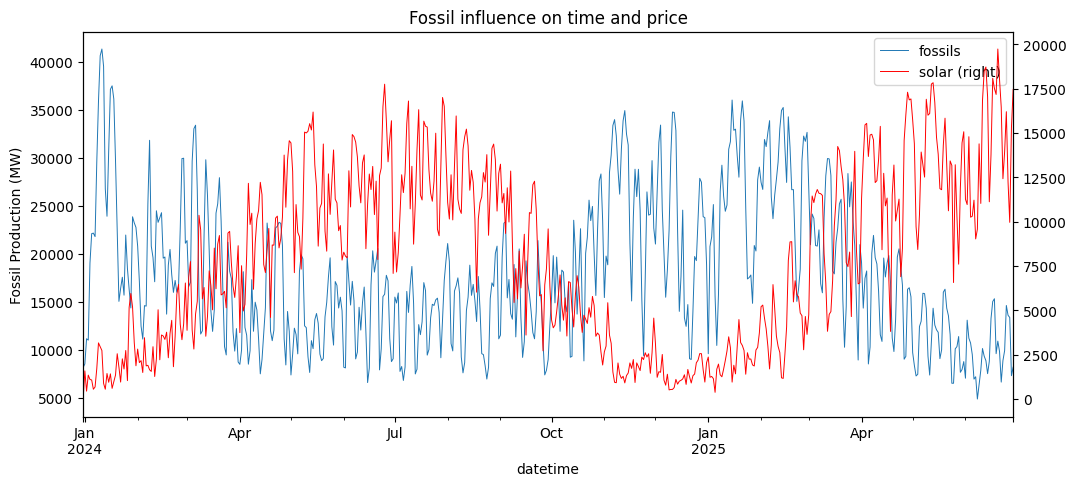

In [30]:
# Fossile Energiequellen summieren (doppelte eckige Klammern!)
data_daily["fossils"] = data_daily[["fossil_gas", "fossil_brown_coal_lignite", "fossil_hard_coal"]].sum(axis=1)

ax = data_daily.plot(
    x='datetime',
    y='fossils',
    title='Fossil influence on time and price',
    xlabel='Date',
    ylabel='Fossil Production (MW)',
    figsize=(12, 5),
    linewidth=0.7
)

bx = data_daily.plot(
    x='datetime',
    y='solar',
    ax=ax,
    secondary_y=True,
    color='red',
    linewidth=0.7
)

plt.show()

We can clearly see the inverse seasonal correlation between solar generation and fossil fuel production.
However, we need to be careful not to assume that the magnitude of both energy sources is comparable

In [31]:
fossils_plot = data_daily.hvplot.line(
    x='datetime',
    y='fossils',
    title='German Total Fossil Production 2024-2025 (Daily Average)',
    xlabel='Date',
    ylabel='Total Fossil Production (MW)',
    width=1200,
    height=500)




fossils_plot = fossils_plot
fossils_plot * solar_plot

a = solar * fossils_plot * zero_line
a

:Overlay
   .Curve.I  :Curve   [datetime]   (solar)
   .Curve.II :Curve   [datetime]   (fossils)
   .HLine.I  :HLine   [x,y]

As we can see more clearly in this diagram, fossil fuels, especially as a whole, are produced or demanded far more than solar energy across all seasons

In [32]:
print(data_de.price.mean())
print(data_de.price.max())
print(data_de.solar.mean())
print(data_de.solar.max())


82.51501335572006
936.28
7923.698033529216
52084.5


In [35]:
data_de["fossils"] = data_de[["fossil_gas", "fossil_brown_coal_lignite", "fossil_hard_coal"]].sum(axis=1)

price_fossils = data_de.hvplot.scatter(x='fossils', y='price', title=' Price vs Fossils production',
                                   xlabel='Fossils Production in MW', ylabel='Price in €/MWh (total)', color='#ff7f0e', size=50, alpha=0.6)
price_fossils

# NaN-Werte entfernen
valid_data = data_de[['fossils', 'price']].dropna()

x = valid_data['fossils'].values
y = valid_data['price'].values

# Lineare Regression (Polynom 1. Grades)
coefficients = np.polyfit(x, y, 1)  # [slope, intercept]
regression_line = np.poly1d(coefficients)

# x-Werte für die Linie
x_line = np.linspace(x.min(), x.max(), 100)
y_line = regression_line(x_line)

# Scatter Plot
price_fossils = data_de.hvplot.scatter(
    x='fossils', y='price', 
    title='Price vs Fossils Production',
    xlabel='Fossils Production (MW)', 
    ylabel='Price (€/MWh)',
    color='#ff7f0e', size=2, alpha=0.6
)

# Regressionsgerade
reg_df = pd.DataFrame({'fossils': x_line, 'price': y_line})
regression = reg_df.hvplot.line(
    x='fossils', y='price', 
    color='red', line_width=3, 
    label=f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}'
)

# Kombinieren
plot = price_fossils * regression * zero_line
plot.opts(width=1200, height=500) 

:Overlay
   .Scatter.I                                          :Scatter   [fossils]   (price)
   .Curve.Y_equals_0_full_stop_00x_plus_0_full_stop_41 :Curve   [fossils]   (price)
   .HLine.I                                            :HLine   [x,y]

In [36]:

price_fossils = data_de.hvplot.scatter(x='fossils', y='price', title=' Price vs Fossils production',
                                   xlabel='Fossils Production in MW', ylabel='Price in €/MWh (total)', color='#ff7f0e', size=50, alpha=0.6)
price_fossils

# NaN-Werte entfernen
valid_data = data_de[['solar', 'price']].dropna()

x = valid_data['solar'].values
y = valid_data['price'].values

# Lineare Regression (Polynom 1. Grades)
coefficients = np.polyfit(x, y, 1)  # [slope, intercept]
regression_line = np.poly1d(coefficients)

# x-Werte für die Linie
x_line = np.linspace(x.min(), x.max(), 100)
y_line = regression_line(x_line)

# Scatter Plot
price_fossils = data_de.hvplot.scatter(
    x='solar', y='price', 
    title='Price vs Fossils Production',
    xlabel='Fossils Production (MW)', 
    ylabel='Price (€/MWh)',
    color='#ff7f0e', size=2, alpha=0.6
)

# Regressionsgerade
reg_df = pd.DataFrame({'solar': x_line, 'price': y_line})
regression = reg_df.hvplot.line(
    x='solar', y='price', 
    color='red', line_width=3, 
    label=f'y = {coefficients[0]:.2f}x + {coefficients[1]:.2f}'
)

# Kombinieren
plot = price_fossils * regression * zero_line
plot.opts(width=1200, height=500) 

:Overlay
   .Scatter.I                                                        :Scatter   [solar]   (price)
   .Curve.Y_equals_hyphen_minus_0_full_stop_00x_plus_99_full_stop_98 :Curve   [solar]   (price)
   .HLine.I                                                          :HLine   [x,y]

As the price strongly and positively correlates with fossil fuels which is expected at this point

 and negatively correlates with solar energy, we can compare these effects.


We should aim to further analyze this circumstance to make better price predictions

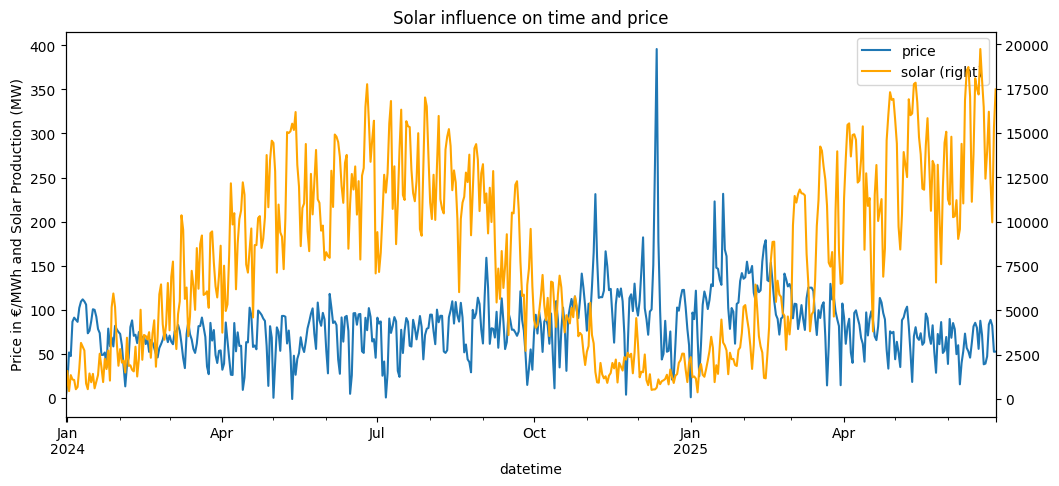

In [37]:
#zeit vs (preis vs solar)
ax = data_daily.plot(
    x='datetime',
    y='price',
    title='Solar influence on time and price',
    xlabel='Date',
    ylabel='Price in €/MWh and Solar Production (MW)',
    figsize=(12, 5)
)

bx = data_daily.plot(
    x='datetime',
    y='solar',
    ax=ax,
    secondary_y=True,
    color='orange'
)
plt.show()

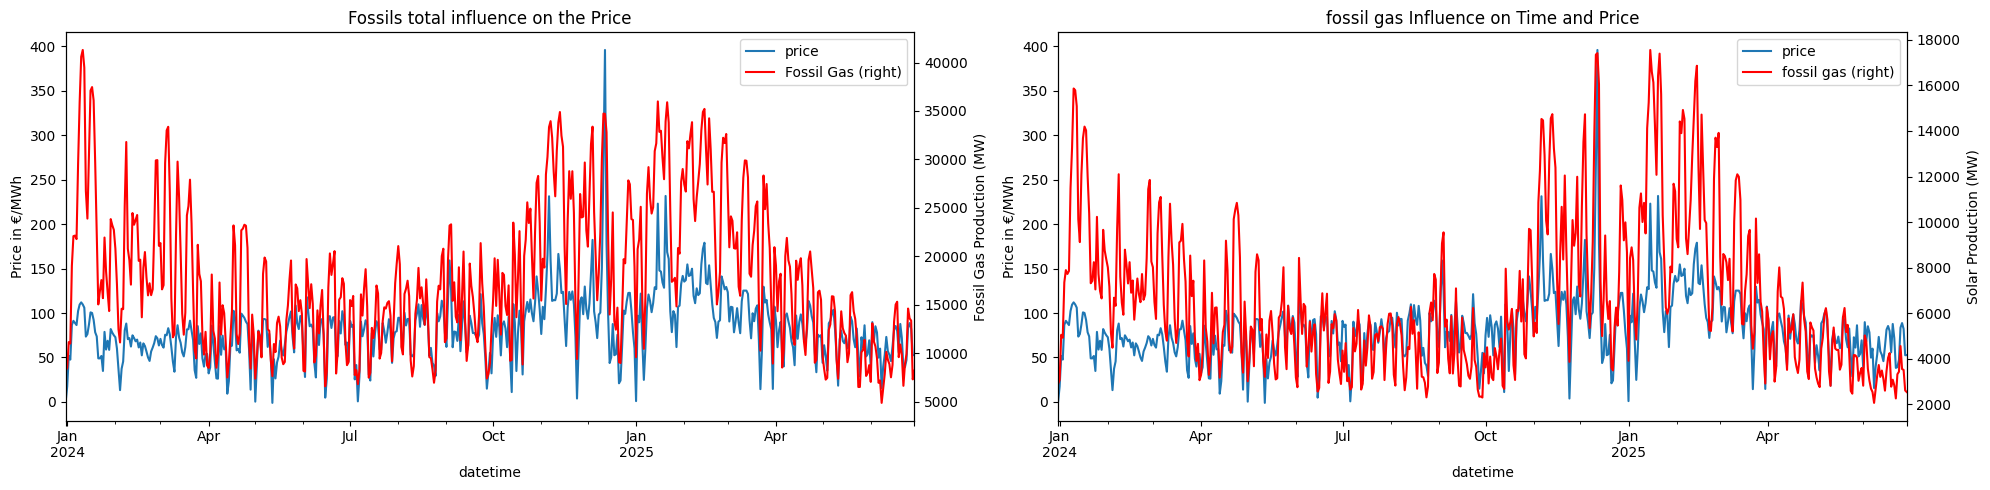

In [44]:
import matplotlib.pyplot as plt

# Figure mit 2 Subplots nebeneinander erstellen
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# Erster Plot (links)
data_daily.plot(
    x='datetime',
    y='price',
    title='Fossils total influence on the Price',
    xlabel='Date',
    ylabel='Price in €/MWh',
    ax=ax1
)
bx1 = data_daily.plot(
    x='datetime',
    y='fossils',
    ax=ax1,
    secondary_y=True,
    color='red',
    label='Fossil Gas'
)
ax1.right_ax.set_ylabel('Fossil Gas Production (MW)')

# Zweiter Plot (rechts)
data_daily.plot(
    x='datetime',
    y='price',
    title='fossil gas Influence on Time and Price',  # anderen Titel
    xlabel='Date',
    ylabel='Price in €/MWh',
    ax=ax2
)
bx2 = data_daily.plot(
    x='datetime',
    y='fossil_gas',  # andere Variable
    ax=ax2,
    secondary_y=True,
    color='red',
    label='fossil gas'
)
ax2.right_ax.set_ylabel('Solar Production (MW)')

plt.tight_layout()  # Verhindert Überlappungen
plt.show()

The price of is seems to be explained very well by how much demand for fossil enery exist
It is also a litle bit better explaiend by fossil gas than overall fossil fuel

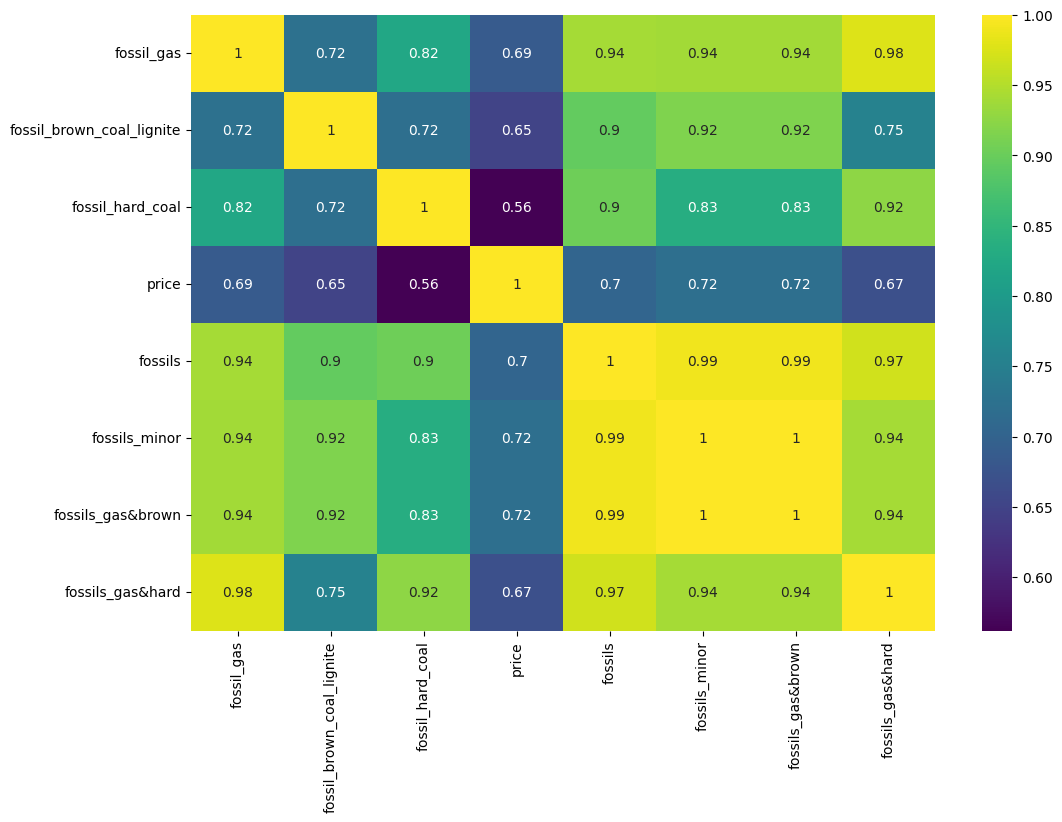

In [52]:
#fossil gas and fossils in general correlation to the price
""" hier wollen wir den Preis mit den fossilen Energiequellen vergleichen,
dabei wollen wir sehen in welcher anordnung die korrelation am stärksten ist."""

fossil_data = data_de.copy()

# Korrigiert: doppelte eckige Klammern verwenden
fossil_data['fossils_minor'] = fossil_data['fossil_gas'] + fossil_data['fossil_brown_coal_lignite']
fossil_data['fossils_gas&brown'] = fossil_data[['fossil_gas', 'fossil_brown_coal_lignite']].sum(axis=1)
fossil_data['fossils_gas&hard'] = fossil_data[['fossil_gas', 'fossil_hard_coal']].sum(axis=1)  

fossil_data = fossil_data[['fossil_gas', 'fossil_brown_coal_lignite', 'fossil_hard_coal', 'price', 'fossils', 'fossils_minor', 'fossils_gas&brown', 'fossils_gas&hard']]

plt.figure(figsize=(12, 8))
sns.heatmap(fossil_data.corr(), annot=True, cmap='viridis')
plt.show()



Even tho fossil gas is by far the biggest factor, there is the hourly price change over the course of 2024 - 2025 is very much correlates with minor fossil fuels
also